In [58]:
import numpy as np
import plateaumodules as pm


south=["Qihe","LiangDaoF","LiangDaoM","Suogang","Dushan","Xinyi",
       "Dashuitian","Daxi","Ami","Ma555_G6","Dai"]
seasia=["Oakaie1","Man_Bac","Nui_Nap","Ban_Chiang",
        "Ma912_G2","La727_G2","Vt833_G2","Vt880_G2",
       "Vt777_G3","Vt719_G3_1"]
pD="/mnt/solexa/mel_yang/early_CN/"
fhall="F4.list.F4"
fhtv="F4.list.F4tv"
out="Mbuti"

relto="Qihe"
vlist=south
mynames=south
wantedcolors=["blue"]*len(vlist)
mypops2=[[out,seasia,relto,south]]
#mypops2=[[out,south,relto,seasia]]
mytuples=[[(0,2),(1,3)]]



count=0
Zaryall = pm.mkDary(pD,fhall,mypops2[count],mytuples[count][0],mytuples[count][1],'Z')
Daryall = pm.mkDary(pD,fhall,mypops2[count],mytuples[count][0],mytuples[count][1],'D')
Zaryall=np.transpose(Zaryall)
Daryall=np.transpose(Daryall)
SEaryall=Daryall/Zaryall 
Zarytv = pm.mkDary(pD,fhtv,mypops2[count],mytuples[count][0],mytuples[count][1],'Z')
Darytv = pm.mkDary(pD,fhtv,mypops2[count],mytuples[count][0],mytuples[count][1],'D')
Zarytv=np.transpose(Zarytv)
Darytv=np.transpose(Darytv)
SEarytv=Darytv/Zarytv

mynames=vlist


In [31]:
print Daryall[10,0]

0.001033


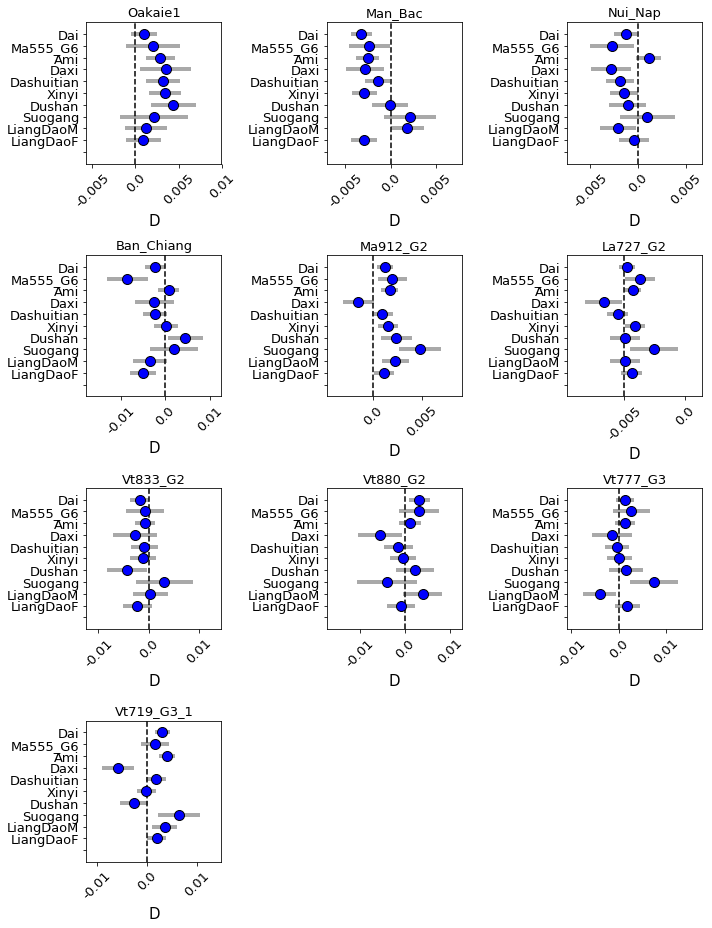

In [66]:
import matplotlib.pyplot as plt
import matplotlib

seasia=["Oakaie1","Man_Bac","Nui_Nap","Ban_Chiang",
        "Ma912_G2","La727_G2","Vt833_G2","Vt880_G2",
       "Vt777_G3","Vt719_G3_1"]

xlims=(-0.003,0.01)
fig = plt.figure(figsize=(10,13))
for jind,sea in enumerate(seasia):
    ax1=fig.add_subplot(4,3,jind+1)
    vals=[]
    for ind,i in enumerate(vlist):
        if i == "Qihe": continue
        vals.extend([Darytv[ind][jind]-2*SEarytv[ind][jind],Darytv[ind][jind]+2*SEarytv[ind][jind]])
        ax1.errorbar(Darytv[ind][jind],ind,xerr=SEarytv[ind][jind],color=wantedcolors[ind],alpha=1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        #ax1.errorbar(Darytv[ind][jind],ind,xerr=2*SEarytv[ind][jind],color=wantedcolors[ind],alpha=1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        #ax1.plot(Darytv[ind,jind],ind,'.',alpha=0.05)

        #ax1.errorbar(Daryall[ind][jind],ind,xerr=SEaryall[ind][jind],color=wantedcolors[ind],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        #ax1.errorbar(Daryall[ind][jind],ind,xerr=2*SEaryall[ind][jind],color=wantedcolors[ind],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        #ax1.plot(Daryall[ind],ind,'.')

    myys = np.array(range(len(mynames)))
    ax1.set_yticks(myys)
    if count==0:
        ax1.set_yticklabels([""]+mynames[1:],fontsize=13)
    else: 
        ax1.set_yticklabels(['']*len(mynames),fontsize=3)

    ax1.set_ylim(-1,len(mynames))
    if count==0: ax1.set_xlim(min(vals),max(vals))
    else: ax1.set_xlim(-min(vals),-max(vals))

    xlabel = ax1.get_xticks().tolist()
    ax1.set_xticklabels(xlabel,rotation=45,fontsize=13)

    ax1.set_title(sea,fontsize=13)

    ax1.axvline(x=0, ls='dashed', c='black')
    #for myline in [9.5]:
    #    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)
    ax1.set_xlabel("D",fontsize=15)
    #ax1.set_xlabel("D, %s" % tv,fontsize=15)
    #print min(vals),max(vals)
plt.tight_layout()
plt.show()

In [67]:
#%%writefile /mnt/solexa/mel_yang/early_CN/makeasymmetry_table.py

import numpy as np
import plateaumodules as pm
#import matplotlib.pyplot as plt
#import matplotlib
#import matplotlib.colors
pD="/mnt/solexa/mel_yang/early_CN/"
fh1,tv1,out1=("F4.list.F4","",'Mbuti')
fh2,tv2,out2=("F4.list.F4tv",".tv",'Mbuti')
fh3,tv3,out3=("F4.list.F4","",'Chimp')
fs=15

seasia=["Oakaie1","Man_Bac","Nui_Nap","Ban_Chiang",
        "Ma912_G2","La727_G2","Vt833_G2","Vt880_G2",
       "Vt777_G3","Vt719_G3_1"]
south=["Qihe","LiangDaoF","LiangDaoM","Suogang","Dushan","Xinyi",
       "Ami","Ma555_G6","Dai"]

allinds=south
header1,header2=allinds,allinds
popA=allinds
popB=allinds

myinds=seasia
newfile=open("/mnt/solexa/mel_yang/early_CN/SEA_asymmetric_positive_oMbuti_alltvchimp.txt",'w')
newfile.write("P1\tP2\tP3\tP4\tD1\tZ1\tD2\tZ2\tD3\tZ3\n")
for count,myind in enumerate(myinds):
    print myind
    mypops1=[out1,myind,popA,popB]
    mypops2=[out2,myind,popA,popB]
    mypops3=[out3,myind,popA,popB]
    DorZ="Z"
    newname="D_EA_EA_%s_%s" % (myind,"MbuChimp")
    Zary1 = pm.mkDary(pD,fh1,mypops1,(0,1),(2,3),'Z')
    Dary1 = pm.mkDary(pD,fh1,mypops1,(0,1),(2,3),'D')
    Zary2 = pm.mkDary(pD,fh2,mypops2,(0,1),(2,3),'Z')
    Dary2 = pm.mkDary(pD,fh2,mypops2,(0,1),(2,3),'D')
    Zary3 = pm.mkDary(pD,fh3,mypops3,(0,1),(2,3),'Z')
    Dary3 = pm.mkDary(pD,fh3,mypops3,(0,1),(2,3),'D')
    #print Zary1
    for row in range(Zary1.shape[0]):
        for col in range(Zary1.shape[1]):
            if Zary1[row,col]>3: # and Zary2[row,col]>3 and Zary3[row,col]>3:
                newfile.write(popA[row]+'\t'+popB[col]+'\t'+myind+'\t'+"MbuChimp"+"\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\n" % (Dary1[row,col],Zary1[row,col],Dary2[row,col],Zary2[row,col],Dary3[row,col],Zary3[row,col]))
newfile.close()

Oakaie1
Man_Bac
Nui_Nap
Ban_Chiang
Ma912_G2
La727_G2
Vt833_G2
Vt880_G2
Vt777_G3
Vt719_G3_1


In [80]:
import numpy as np
import plateaumodules as pm


south=["Qihe","LiangDaoF","LiangDaoM","Suogang","Dushan","Xinyi",
       "Dashuitian","Daxi","Ami","Ma555_G6","Dai"]
seasia=["Oakaie1","Man_Bac","Nui_Nap","Ban_Chiang",
        "Ma912_G2","La727_G2","Vt833_G2","Vt880_G2",
       "Vt777_G3","Vt719_G3_1"]
north=["Shamanka_EN","HDYM1","ZongriM297","Hejiatai","Chokhopani","Boshan","XJS","XJS_F","Xiaogao"]
guangxi=["Longlin","Baojianshan","Dushan","Xinyi"]
pD="/mnt/solexa/mel_yang/early_CN/"
fhall="F4.list.F4"
fhtv="F4.list.F4tv"
out="Mbuti"

relto="Shamanka_EN"
vlist=south+north
mynames=south+north
eachsubplot=guangxi
wantedcolors=["blue"]*len(vlist)
mypops2=[[out,eachsubplot,relto,vlist]]
#mypops2=[[out,south,relto,seasia]]
mytuples=[[(0,2),(1,3)]]



count=0
Zaryall = pm.mkDary(pD,fhall,mypops2[count],mytuples[count][0],mytuples[count][1],'Z')
Daryall = pm.mkDary(pD,fhall,mypops2[count],mytuples[count][0],mytuples[count][1],'D')
Zaryall=np.transpose(Zaryall)
Daryall=np.transpose(Daryall)
SEaryall=Daryall/Zaryall 
Zarytv = pm.mkDary(pD,fhtv,mypops2[count],mytuples[count][0],mytuples[count][1],'Z')
Darytv = pm.mkDary(pD,fhtv,mypops2[count],mytuples[count][0],mytuples[count][1],'D')
Zarytv=np.transpose(Zarytv)
Darytv=np.transpose(Darytv)
SEarytv=Darytv/Zarytv


In [70]:
print Daryall

[[      nan  0.001672  0.004012]
 [      nan  0.002043  0.002805]
 [      nan  0.001725  0.004309]
 [      nan  0.004947  0.006151]
 [      nan  0.003371       nan]
 [      nan  0.002276  0.002328]
 [      nan  0.001527  0.001735]
 [      nan  0.000866  0.001246]
 [      nan  0.002561  0.003372]
 [      nan  0.001269  0.000517]
 [      nan  0.001573  0.00222 ]
 [      nan -0.001746 -0.001465]
 [      nan  0.001212 -0.000232]
 [      nan -0.000239  0.000682]
 [      nan  0.001079  0.000141]
 [      nan -0.000228 -0.000528]
 [      nan  0.001031  0.001573]
 [      nan  0.001073  0.001822]
 [      nan  0.002324  0.003623]
 [      nan  0.001593  0.002916]]


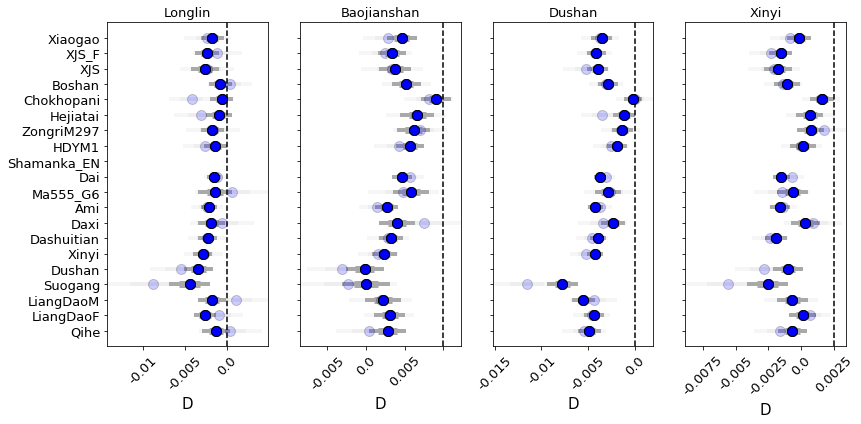

In [81]:
import matplotlib.pyplot as plt
import matplotlib

xlims=(-0.003,0.01)
fig = plt.figure(figsize=(12,6))
for jind,sea in enumerate(eachsubplot):
    ax1=fig.add_subplot(1,4,jind+1)
    vals=[]
    for ind,i in enumerate(vlist):
        vals.extend([-Darytv[ind][jind]-2*SEarytv[ind][jind],-Darytv[ind][jind]+2*SEarytv[ind][jind]])
        ax1.errorbar(-Darytv[ind][jind],ind,xerr=SEarytv[ind][jind],color=wantedcolors[ind],alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        ax1.errorbar(-Darytv[ind][jind],ind,xerr=2*SEarytv[ind][jind],color=wantedcolors[ind],alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        #ax1.plot(Darytv[ind,jind],ind,'.',alpha=0.05)

        ax1.errorbar(-Daryall[ind][jind],ind,xerr=SEaryall[ind][jind],color=wantedcolors[ind],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        ax1.errorbar(-Daryall[ind][jind],ind,xerr=2*SEaryall[ind][jind],color=wantedcolors[ind],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        #ax1.plot(Daryall[ind],ind,'.')

    myys = np.array(range(len(mynames)))
    ax1.set_yticks(myys)
    if jind==0:
        ax1.set_yticklabels(mynames,fontsize=13)
    else: 
        ax1.set_yticklabels(['']*len(mynames),fontsize=3)

    ax1.set_ylim(-1,len(mynames))
    if count==0: ax1.set_xlim(min(vals),max(vals))
    else: ax1.set_xlim(-min(vals),-max(vals))

    xlabel = ax1.get_xticks().tolist()
    ax1.set_xticklabels(xlabel,rotation=45,fontsize=13)

    ax1.set_title(sea,fontsize=13)

    ax1.axvline(x=0, ls='dashed', c='black')
    #for myline in [9.5]:
    #    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)
    ax1.set_xlabel("D",fontsize=15)
    #ax1.set_xlabel("D, %s" % tv,fontsize=15)
    #print min(vals),max(vals)
plt.tight_layout()
plt.show()

In [84]:
import numpy as np
import plateaumodules as pm


south=["Qihe","LiangDaoF","LiangDaoM","Suogang","Dushan","Xinyi",
       "Dashuitian","Daxi","Ami","Ma555_G6","Dai"]
seasia=["Oakaie1","Man_Bac","Nui_Nap","Ban_Chiang",
        "Ma912_G2","La727_G2","Vt833_G2","Vt880_G2",
       "Vt777_G3","Vt719_G3_1"]
north=["Shamanka_EN","HDYM1","ZongriM297","Hejiatai","Chokhopani","Boshan","XJS","XJS_F","Xiaogao"]
guangxi=["Longlin","Baojianshan","Dushan","Xinyi"]
pD="/mnt/solexa/mel_yang/early_CN/"
fhall="F4.list.F4"
fhtv="F4.list.F4tv"
out="Mbuti"

relto="Han"
vlist=south+north
mynames=south+north
eachsubplot=guangxi+["JomonM","Jomon"]
wantedcolors=["blue"]*len(vlist)
mypops2=[[out,eachsubplot,relto,vlist]]
#mypops2=[[out,south,relto,seasia]]
mytuples=[[(0,2),(1,3)]]



count=0
Zaryall = pm.mkDary(pD,fhall,mypops2[count],mytuples[count][0],mytuples[count][1],'Z')
Daryall = pm.mkDary(pD,fhall,mypops2[count],mytuples[count][0],mytuples[count][1],'D')
Zaryall=np.transpose(Zaryall)
Daryall=np.transpose(Daryall)
SEaryall=Daryall/Zaryall 
Zarytv = pm.mkDary(pD,fhtv,mypops2[count],mytuples[count][0],mytuples[count][1],'Z')
Darytv = pm.mkDary(pD,fhtv,mypops2[count],mytuples[count][0],mytuples[count][1],'D')
Zarytv=np.transpose(Zarytv)
Darytv=np.transpose(Darytv)
SEarytv=Darytv/Zarytv


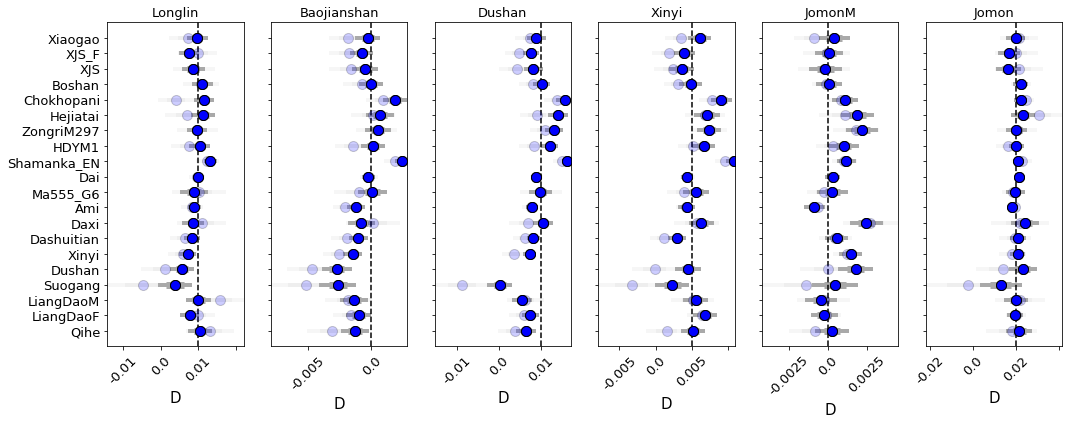

In [85]:
import matplotlib.pyplot as plt
import matplotlib

xlims=(-0.003,0.01)
fig = plt.figure(figsize=(15,6))
for jind,sea in enumerate(eachsubplot):
    ax1=fig.add_subplot(1,6,jind+1)
    vals=[]
    for ind,i in enumerate(vlist):
        vals.extend([-Darytv[ind][jind]-2*SEarytv[ind][jind],-Darytv[ind][jind]+2*SEarytv[ind][jind]])
        ax1.errorbar(-Darytv[ind][jind],ind,xerr=SEarytv[ind][jind],color=wantedcolors[ind],alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        ax1.errorbar(-Darytv[ind][jind],ind,xerr=2*SEarytv[ind][jind],color=wantedcolors[ind],alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        #ax1.plot(Darytv[ind,jind],ind,'.',alpha=0.05)

        ax1.errorbar(-Daryall[ind][jind],ind,xerr=SEaryall[ind][jind],color=wantedcolors[ind],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        ax1.errorbar(-Daryall[ind][jind],ind,xerr=2*SEaryall[ind][jind],color=wantedcolors[ind],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        #ax1.plot(Daryall[ind],ind,'.')

    myys = np.array(range(len(mynames)))
    ax1.set_yticks(myys)
    if jind==0:
        ax1.set_yticklabels(mynames,fontsize=13)
    else: 
        ax1.set_yticklabels(['']*len(mynames),fontsize=3)

    ax1.set_ylim(-1,len(mynames))
    if count==0: ax1.set_xlim(min(vals),max(vals))
    else: ax1.set_xlim(-min(vals),-max(vals))

    xlabel = ax1.get_xticks().tolist()
    ax1.set_xticklabels(xlabel,rotation=45,fontsize=13)

    ax1.set_title(sea,fontsize=13)

    ax1.axvline(x=0, ls='dashed', c='black')
    #for myline in [9.5]:
    #    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)
    ax1.set_xlabel("D",fontsize=15)
    #ax1.set_xlabel("D, %s" % tv,fontsize=15)
    #print min(vals),max(vals)
plt.tight_layout()
plt.show()

In [89]:
import numpy as np
import plateaumodules as pm


south=["Qihe","LiangDaoF","LiangDaoM","Suogang","Dushan","Xinyi",
       "Dashuitian","Daxi","Ami","Ma555_G6","Dai"]
seasia=["Oakaie1","Man_Bac","Nui_Nap","Ban_Chiang",
        "Ma912_G2","La727_G2","Vt833_G2","Vt880_G2",
       "Vt777_G3","Vt719_G3_1"]
north=["Shamanka_EN","HDYM1","ZongriM297","Hejiatai","Chokhopani","Bbdong","Boshan","XJS","XJS_F","Xiaogao"]
guangxi=["Longlin","Baojianshan","Dushan","Xinyi"]
pD="/mnt/solexa/mel_yang/early_CN/"
fhall="F4.list.F4"
fhtv="F4.list.F4tv"
out="Mbuti"

relto="LiangDaoF"
vlist=north
mynames=north
eachsubplot=["Kolyma_River","Boisman_MN","DevilsGate","Shamanka_EN","HDYM1","Chokhopani"]
wantedcolors=["blue"]*len(vlist)
mypops2=[[out,eachsubplot,relto,vlist]]
#mypops2=[[out,south,relto,seasia]]
mytuples=[[(0,2),(1,3)]]



count=0
Zaryall = pm.mkDary(pD,fhall,mypops2[count],mytuples[count][0],mytuples[count][1],'Z')
Daryall = pm.mkDary(pD,fhall,mypops2[count],mytuples[count][0],mytuples[count][1],'D')
Zaryall=np.transpose(Zaryall)
Daryall=np.transpose(Daryall)
SEaryall=Daryall/Zaryall 
Zarytv = pm.mkDary(pD,fhtv,mypops2[count],mytuples[count][0],mytuples[count][1],'Z')
Darytv = pm.mkDary(pD,fhtv,mypops2[count],mytuples[count][0],mytuples[count][1],'D')
Zarytv=np.transpose(Zarytv)
Darytv=np.transpose(Darytv)
SEarytv=Darytv/Zarytv


In [96]:
print Daryall
print np.isnan(Daryall[0,3])

[[0.003748 0.003218 0.005017      nan 0.00456  0.001391]
 [0.002509 0.003586 0.004667 0.00553       nan 0.001765]
 [0.001101 0.001332 0.001304 0.002151 0.003255 0.002241]
 [0.001294 0.000992 0.004188 0.002878 0.004582 0.001978]
 [0.000512 0.000461 0.002627 0.001778 0.001385      nan]
 [0.00182  0.003789 0.004639 0.003431 0.003356 0.001936]
 [0.003106 0.004177 0.004986 0.003892 0.004268 0.002402]
 [0.002646 0.004081 0.004172 0.00297  0.004659 0.001937]
 [0.002187 0.00356  0.004468 0.002732 0.003768 0.002126]
 [0.002887 0.003319 0.004055 0.002897 0.003961 0.001557]]
True


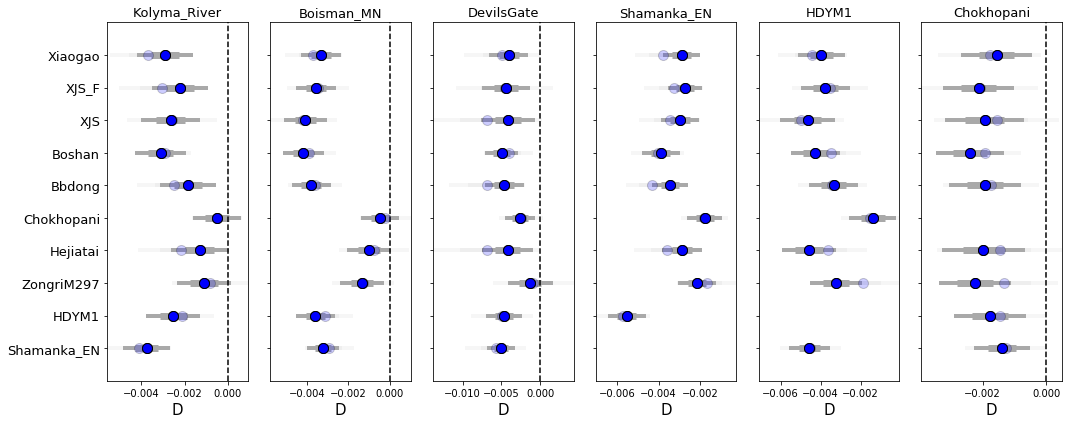

In [99]:
import matplotlib.pyplot as plt
import matplotlib

xlims=(-0.003,0.01)
fig = plt.figure(figsize=(15,6))
for jind,sea in enumerate(eachsubplot):
    ax1=fig.add_subplot(1,6,jind+1)
    vals=[]
    for ind,i in enumerate(vlist):
        if np.isnan(Darytv[ind][jind])==False: vals.extend([-Darytv[ind][jind]-2*SEarytv[ind][jind],-Darytv[ind][jind]+2*SEarytv[ind][jind]])
        ax1.errorbar(-Darytv[ind][jind],ind,xerr=SEarytv[ind][jind],color=wantedcolors[ind],alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        ax1.errorbar(-Darytv[ind][jind],ind,xerr=2*SEarytv[ind][jind],color=wantedcolors[ind],alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        #ax1.plot(Darytv[ind,jind],ind,'.',alpha=0.05)

        ax1.errorbar(-Daryall[ind][jind],ind,xerr=SEaryall[ind][jind],color=wantedcolors[ind],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        ax1.errorbar(-Daryall[ind][jind],ind,xerr=2*SEaryall[ind][jind],color=wantedcolors[ind],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        #ax1.plot(Daryall[ind],ind,'.')

    myys = np.array(range(len(mynames)))
    ax1.set_yticks(myys)
    if jind==0:
        ax1.set_yticklabels(mynames,fontsize=13)
    else: 
        ax1.set_yticklabels(['']*len(mynames),fontsize=3)

    ax1.set_ylim(-1,len(mynames))
    ax1.set_xlim(min(vals),max(vals))

    #xlabel = ax1.get_xticks().tolist()
    #ax1.set_xticklabels(xlabel,rotation=45,fontsize=13)

    ax1.set_title(sea,fontsize=13)

    ax1.axvline(x=0, ls='dashed', c='black')
    #for myline in [9.5]:
    #    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)
    ax1.set_xlabel("D",fontsize=15)
    #ax1.set_xlabel("D, %s" % tv,fontsize=15)
    #print min(vals),max(vals)
plt.tight_layout()
plt.show()